In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("../data/hdb_with_mrt_info.csv")

# Check missing values and unique values for each column
eda_summary = pd.DataFrame({
    "missing_values": df.isna().sum(),
    "unique_values": df.nunique()
})

print(eda_summary)

                          missing_values  unique_values
year                                   0             10
town                                   0             26
flat_type                              0              7
block                                  0           2695
street_name                            0            566
storey_range                           0             17
floor_area_sqm                         0            175
remaining_lease_years                  0             58
resale_price                           0           4232
storey_range_category                  0              5
distance_from_expressway               0              6
latitude                               0           9479
longitude                              0           9479
address                                0           9479
postal                                 0           9479
num_nearby_mrts                        0             12
nearest_mrt                            0        

In [2]:
# Select the relevant columns
subset_df = df[["latitude", "longitude", "address", "postal", "nearest_mrt_distance"]]

# Check how many unique rows there are in the subset
unique_combinations = subset_df.drop_duplicates().shape[0]
print("Number of unique combinations:", unique_combinations)

Number of unique combinations: 9479


We found that features like latitude, longitude, address, postal, nearest_mrt_distance actually have a one-to-one spatial correspondence.
These columns jointly define a location and many columns are actually redundant.

In [3]:
# 4. Check data type of each column
type_df = pd.DataFrame({
    'column': df.columns,
    'data_type': [df[col].dtype for col in df.columns]
})

print(type_df)

                      column data_type
0                       year     int64
1                       town    object
2                  flat_type    object
3                      block    object
4                street_name    object
5               storey_range    object
6             floor_area_sqm   float64
7      remaining_lease_years     int64
8               resale_price   float64
9      storey_range_category    object
10  distance_from_expressway    object
11                  latitude   float64
12                 longitude   float64
13                   address    object
14                    postal     int64
15           num_nearby_mrts     int64
16               nearest_mrt    object
17      nearest_mrt_distance   float64


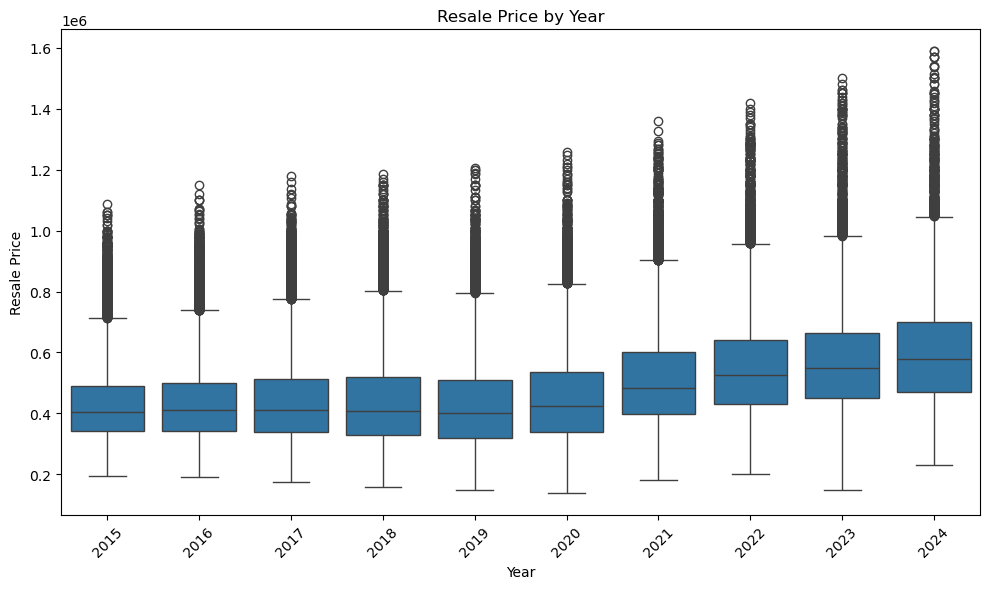

   year  min_price  q1_price  median_price     mean_price  q3_price  \
0  2015   195000.0  342000.0      405000.0  435016.190615  490000.0   
1  2016   190000.0  341000.0      410000.0  439382.896986  500000.0   
2  2017   175000.0  338000.0      410000.0  444486.156816  512999.5   
3  2018   160000.0  328000.0      408000.0  441918.971265  518000.0   
4  2019   150000.0  320000.0      400000.0  432384.154064  510000.0   
5  2020   140000.0  340000.0      425000.0  452444.871497  535000.0   
6  2021   180000.0  398000.0      483000.0  511549.330698  600000.0   
7  2022   200000.0  430000.0      525000.0  549686.329328  640000.0   
8  2023   150000.0  450000.0      550000.0  571968.362658  663000.0   
9  2024   230000.0  470000.0      580000.0  600873.375270  700000.0   

   max_price  count  
0  1088000.0  17504  
1  1150000.0  19013  
2  1180000.0  19975  
3  1185000.0  21141  
4  1205000.0  21651  
5  1258000.0  22758  
6  1360000.0  28397  
7  1418000.0  26207  
8  1500000.0  25113 

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# 5. Boxplot for resale_price by year
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='year', y='resale_price', showfliers=True)
plt.title("Resale Price by Year")
plt.xlabel("Year")
plt.ylabel("Resale Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Summary statistics for resale_price by year
summary_year = df.groupby('year')['resale_price'].agg(
    min_price='min',
    q1_price=lambda x: x.quantile(0.25),
    median_price='median',
    mean_price='mean',
    q3_price=lambda x: x.quantile(0.75),
    max_price='max',
    count='count'
).reset_index()

print(summary_year)

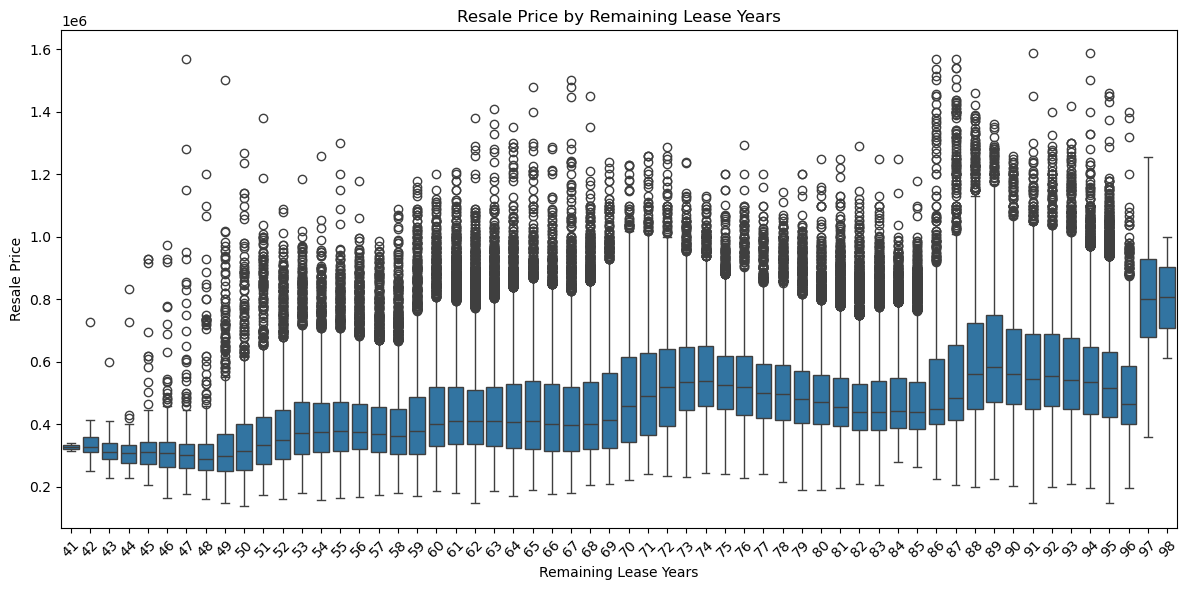

    remaining_lease_years  min_price  q1_price  median_price     mean_price  \
0                      41   315000.0  321250.0      327500.0  327500.000000   
1                      42   250000.0  312500.0      328888.0  339663.200000   
2                      43   230000.0  290000.0      310000.0  314017.130435   
3                      44   230000.0  276000.0      308000.0  311981.810945   
4                      45   205000.0  274000.0      310000.0  319344.010178   
5                      46   165000.0  262000.0      306888.0  311896.745063   
6                      47   178000.0  260000.0      302000.0  314153.317784   
7                      48   160000.0  253000.0      288000.0  309732.722296   
8                      49   150000.0  250000.0      300040.0  336270.541113   
9                      50   140000.0  255250.0      315000.0  354825.153580   
10                     51   175000.0  272400.0      333000.0  376569.095574   
11                     52   160000.0  290000.0      

In [5]:
# 6. Boxplot for resale_price by remaining_lease_years
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='remaining_lease_years', y='resale_price', showfliers=True)
plt.title("Resale Price by Remaining Lease Years")
plt.xlabel("Remaining Lease Years")
plt.ylabel("Resale Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Summary statistics for resale_price by remaining_lease_years
summary_remaining_lease_years = df.groupby('remaining_lease_years')['resale_price'].agg(
    min_price='min',
    q1_price=lambda x: x.quantile(0.25),
    median_price='median',
    mean_price='mean',
    q3_price=lambda x: x.quantile(0.75),
    max_price='max',
    count='count'
).reset_index()

print(summary_remaining_lease_years)

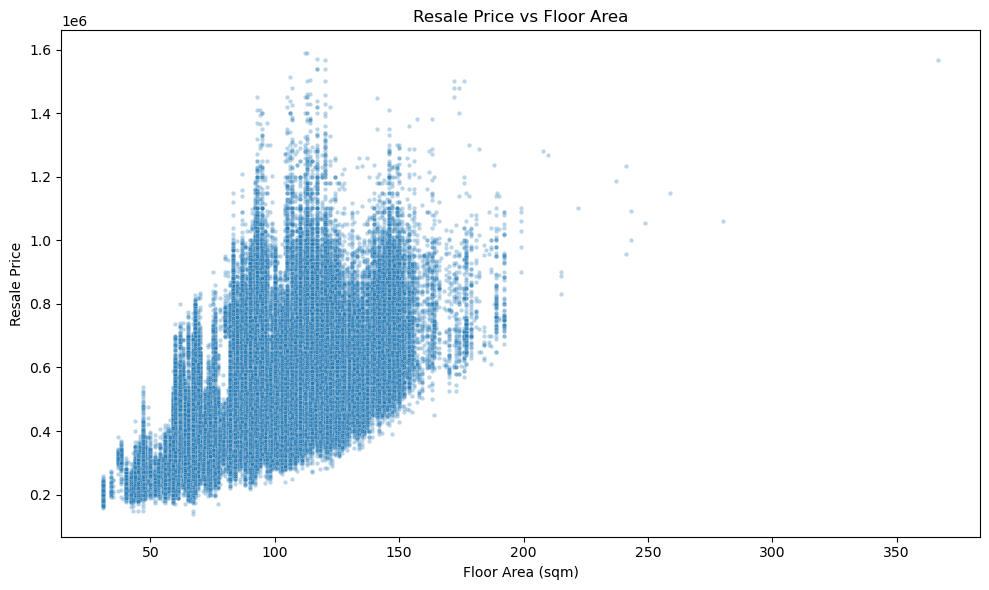

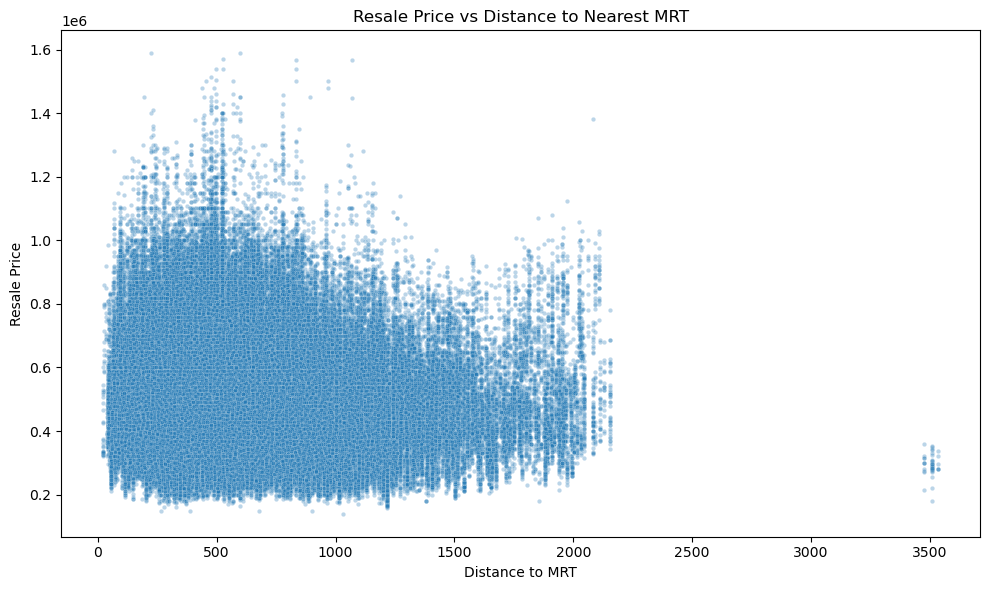

In [6]:
# 7. Scatterplot for floor_area_sqm vs resale_price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='floor_area_sqm', y='resale_price', alpha=0.3, s=10)
plt.title("Resale Price vs Floor Area")
plt.xlabel("Floor Area (sqm)")
plt.ylabel("Resale Price")
plt.tight_layout()
plt.show()

# Scatterplot for nearest_mrt_distance vs resale_price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='nearest_mrt_distance', y='resale_price', alpha=0.3, s=10)
plt.title("Resale Price vs Distance to Nearest MRT")
plt.xlabel("Distance to MRT")
plt.ylabel("Resale Price")
plt.tight_layout()
plt.show()

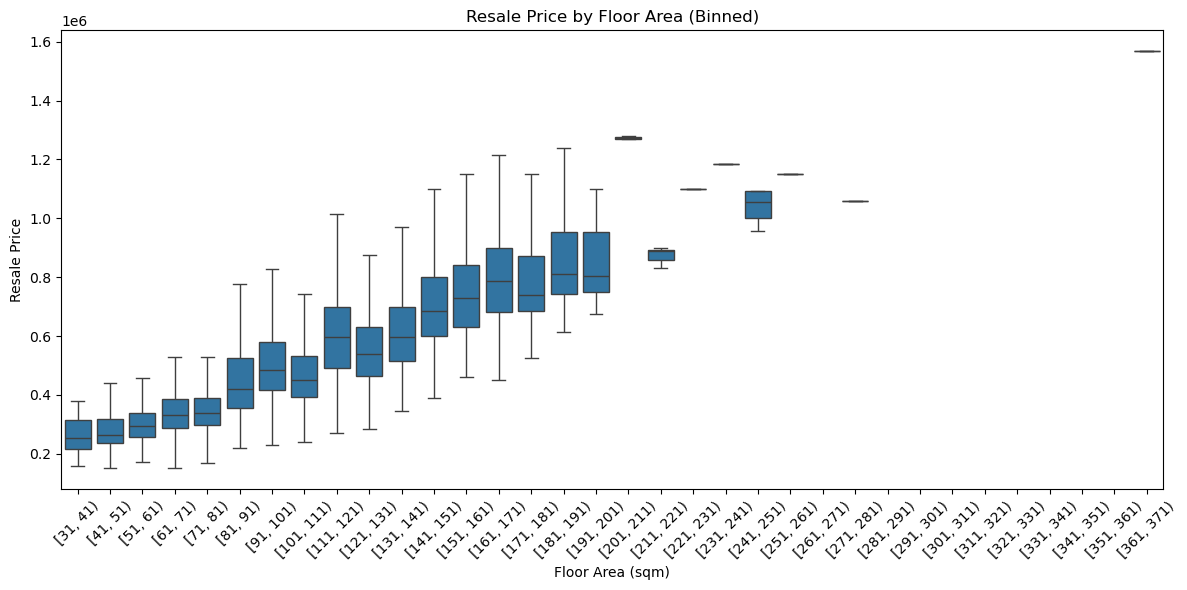

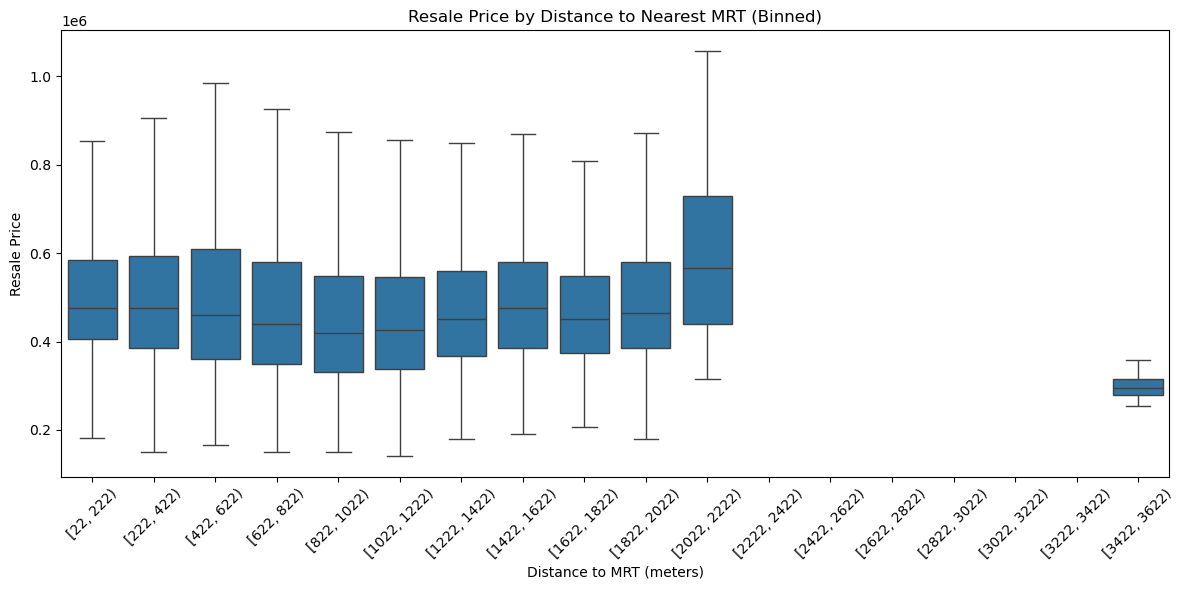

In [9]:
import math
import numpy as np

# 8. Bin floor_area_sqm and create boxplot
floor_min = math.floor(df['floor_area_sqm'].min())
floor_max = math.ceil(df['floor_area_sqm'].max())
floor_breaks = np.arange(floor_min, floor_max + 10, 10)

df['floor_bin'] = pd.cut(df['floor_area_sqm'], bins=floor_breaks, right=False, include_lowest=True)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='floor_bin', y='resale_price', showfliers=False)
plt.title("Resale Price by Floor Area (Binned)")
plt.xlabel("Floor Area (sqm)")
plt.ylabel("Resale Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bin nearest_mrt_distance and create boxplot
mrt_min = math.floor(df['nearest_mrt_distance'].min())
mrt_max = math.ceil(df['nearest_mrt_distance'].max())
mrt_breaks = np.arange(mrt_min, mrt_max + 200, 200)

df['mrt_bin'] = pd.cut(df['nearest_mrt_distance'], bins=mrt_breaks, right=False, include_lowest=True)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='mrt_bin', y='resale_price', showfliers=False)
plt.title("Resale Price by Distance to Nearest MRT (Binned)")
plt.xlabel("Distance to MRT (meters)")
plt.ylabel("Resale Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

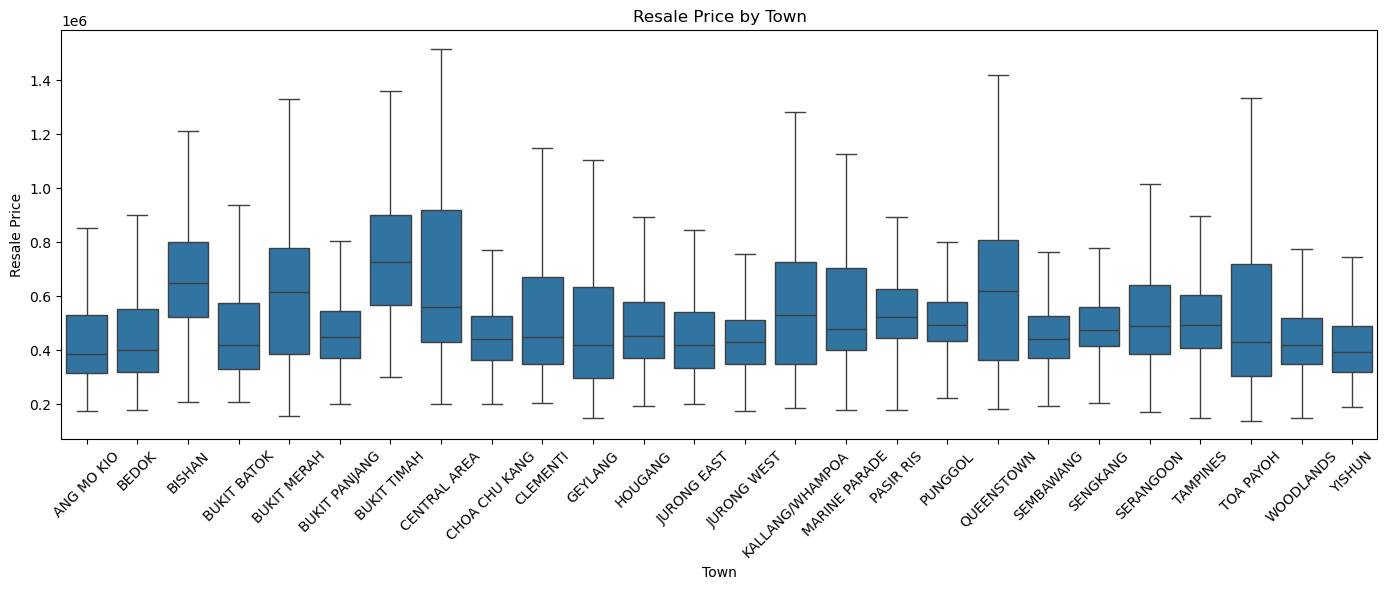

               town  min_price  q1_price  median_price     mean_price  \
0        ANG MO KIO   174000.0  315000.0      385000.0  448673.249362   
1             BEDOK   180000.0  320000.0      400000.0  450093.653171   
2            BISHAN   210000.0  525000.0      650000.0  669547.740101   
3       BUKIT BATOK   208000.0  330000.0      420000.0  459839.839956   
4       BUKIT MERAH   157000.0  385000.0      616000.0  602913.466496   
5     BUKIT PANJANG   200000.0  370000.0      450000.0  466741.788078   
6       BUKIT TIMAH   300000.0  566500.0      725000.0  742855.433539   
7      CENTRAL AREA   200000.0  432000.0      560000.0  666921.926934   
8     CHOA CHU KANG   200000.0  365000.0      443000.0  454671.159078   
9          CLEMENTI   205000.0  350000.0      450000.0  516812.516910   
10          GEYLANG   150000.0  298000.0      418000.0  472574.886246   
11          HOUGANG   195000.0  370000.0      453888.0  485037.252759   
12      JURONG EAST   200000.0  335000.0      42000

In [10]:
# 9. Boxplot for town
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='town', y='resale_price', showfliers=False)
plt.title("Resale Price by Town")
plt.xlabel("Town")
plt.ylabel("Resale Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Summary statistics for town
summary_town = df.groupby("town").agg(
    min_price=("resale_price", "min"),
    q1_price=("resale_price", lambda x: np.percentile(x.dropna(), 25)),
    median_price=("resale_price", "median"),
    mean_price=("resale_price", "mean"),
    q3_price=("resale_price", lambda x: np.percentile(x.dropna(), 75)),
    max_price=("resale_price", "max"),
    count=("resale_price", "count")
).reset_index()

print(summary_town)

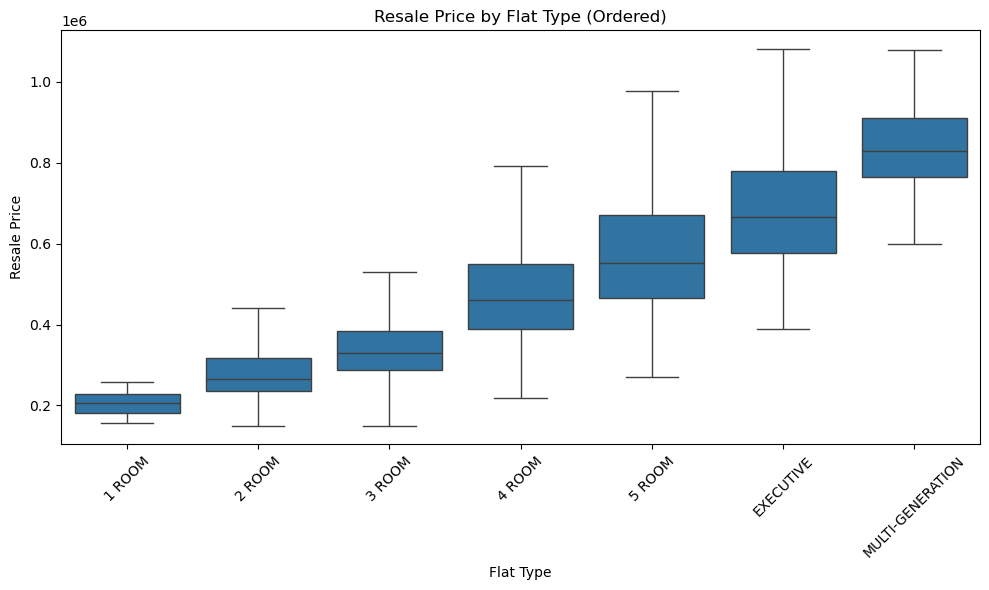

          flat_type  min_price  q1_price  median_price     mean_price  \
0            1 ROOM   157000.0  180500.0      205000.0  204353.459459   
1            2 ROOM   150000.0  235000.0      266444.0  276215.323626   
2            3 ROOM   140000.0  288000.0      330000.0  347885.521467   
3            4 ROOM   218000.0  390000.0      460000.0  490912.365030   
4            5 ROOM   270000.0  465000.0      553000.0  585234.019374   
5         EXECUTIVE   390000.0  578000.0      666888.0  687866.268390   
6  MULTI-GENERATION   600000.0  765000.0      830000.0  836419.012346   

   q3_price  max_price  count  
0  228750.0   258000.0     74  
1  318000.0   585000.0   3640  
2  385000.0  1568000.0  52953  
3  550888.0  1500000.0  91641  
4  670000.0  1588000.0  53769  
5  780000.0  1500000.0  16308  
6  910000.0  1200000.0     81  


/var/folders/c2/mhzjxmps67507jxfds7z5g600000gn/T/ipykernel_27286/3775873996.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_flat_type = df.groupby("flat_type").agg(


In [11]:
# 10. Boxplot for flat_type
flat_type_order = ["1 ROOM", "2 ROOM", "3 ROOM", "4 ROOM", "5 ROOM", "EXECUTIVE", "MULTI-GENERATION"]
df['flat_type'] = pd.Categorical(df['flat_type'], categories=flat_type_order, ordered=True)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='flat_type', y='resale_price', showfliers=False)
plt.title("Resale Price by Flat Type (Ordered)")
plt.xlabel("Flat Type")
plt.ylabel("Resale Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Summary statistics for flat_type
summary_flat_type = df.groupby("flat_type").agg(
    min_price=("resale_price", "min"),
    q1_price=("resale_price", lambda x: np.percentile(x.dropna(), 25)),
    median_price=("resale_price", "median"),
    mean_price=("resale_price", "mean"),
    q3_price=("resale_price", lambda x: np.percentile(x.dropna(), 75)),
    max_price=("resale_price", "max"),
    count=("resale_price", "count")
).reset_index()

print(summary_flat_type)

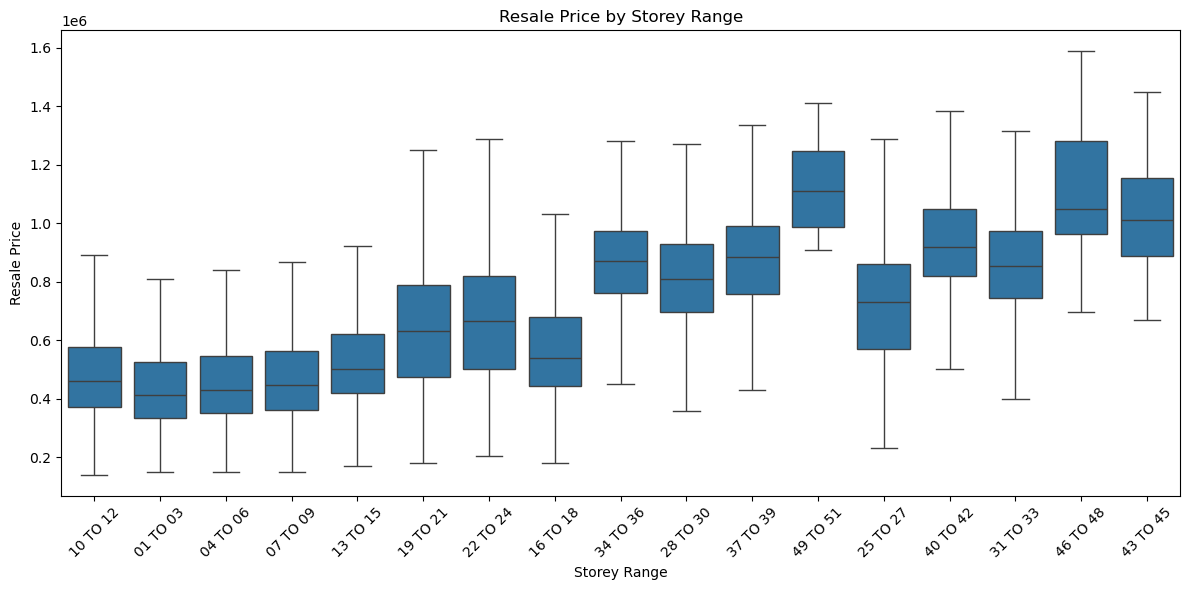

   storey_range  min_price  q1_price  median_price    mean_price   q3_price  \
0      01 TO 03   150000.0  335000.0      412000.0  4.434140e+05   525000.0   
1      04 TO 06   150000.0  350000.0      430000.0  4.618324e+05   546000.0   
2      07 TO 09   150000.0  360000.0      448000.0  4.749381e+05   562888.0   
3      10 TO 12   140000.0  370000.0      460000.0  4.873375e+05   578000.0   
4      13 TO 15   170000.0  418000.0      500000.0  5.276369e+05   620000.0   
5      16 TO 18   180100.0  443000.0      540000.0  5.711583e+05   680000.0   
6      19 TO 21   180000.0  475000.0      630000.0  6.397304e+05   788000.0   
7      22 TO 24   205000.0  503000.0      665000.0  6.699910e+05   818000.0   
8      25 TO 27   230000.0  570000.0      730000.0  7.197723e+05   860000.0   
9      28 TO 30   150000.0  697500.0      810088.0  8.035303e+05   930000.0   
10     31 TO 33   325000.0  745000.0      855000.0  8.529384e+05   975000.0   
11     34 TO 36   355000.0  760000.0      870088.0  

In [12]:
# 11. Boxplot for storey_range
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='storey_range', y='resale_price', showfliers=False)
plt.title("Resale Price by Storey Range")
plt.xlabel("Storey Range")
plt.ylabel("Resale Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Summary statistics for storey_range
summary_storey_range = df.groupby("storey_range").agg(
    min_price=("resale_price", "min"),
    q1_price=("resale_price", lambda x: np.percentile(x.dropna(), 25)),
    median_price=("resale_price", "median"),
    mean_price=("resale_price", "mean"),
    q3_price=("resale_price", lambda x: np.percentile(x.dropna(), 75)),
    max_price=("resale_price", "max"),
    count=("resale_price", "count")
).reset_index()

print(summary_storey_range)

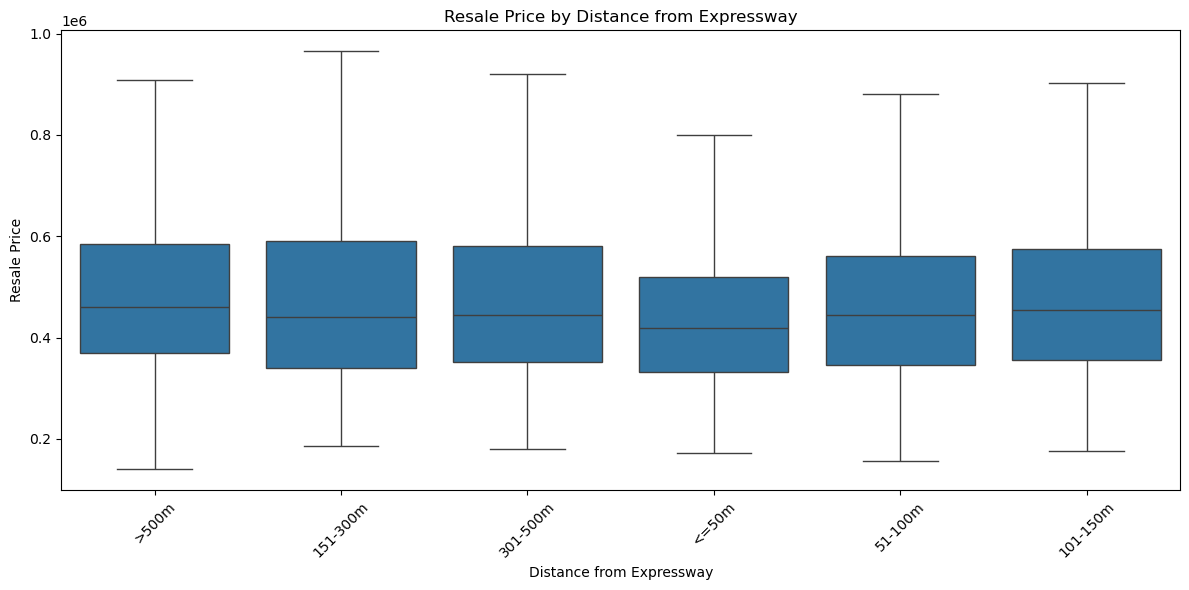

  distance_from_expressway  min_price  q1_price  median_price     mean_price  \
0                 101-150m   176000.0  355000.0      455000.0  482068.950673   
1                 151-300m   185000.0  340000.0      440000.0  484086.788353   
2                 301-500m   180000.0  352000.0      445000.0  488538.581099   
3                  51-100m   157000.0  345000.0      445000.0  465207.919930   
4                    <=50m   172000.0  332666.0      418000.0  439183.243583   
5                    >500m   140000.0  369000.0      460000.0  493333.626886   

   q3_price  max_price   count  
0  575000.0  1300000.0    6244  
1  590000.0  1410000.0    7679  
2  580000.0  1400000.0    3932  
3  560000.0  1230000.0    8519  
4  520000.0  1568000.0    3584  
5  585000.0  1588000.0  188508  


In [13]:
# 12. Boxplot for distance_from_expressway
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='distance_from_expressway', y='resale_price', showfliers=False)
plt.title("Resale Price by Distance from Expressway")
plt.xlabel("Distance from Expressway")
plt.ylabel("Resale Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Summary statistics for distance_from_expressway
summary_distance_from_expressway = df.groupby("distance_from_expressway").agg(
    min_price=("resale_price", "min"),
    q1_price=("resale_price", lambda x: np.percentile(x.dropna(), 25)),
    median_price=("resale_price", "median"),
    mean_price=("resale_price", "mean"),
    q3_price=("resale_price", lambda x: np.percentile(x.dropna(), 75)),
    max_price=("resale_price", "max"),
    count=("resale_price", "count")
).reset_index()

print(summary_distance_from_expressway)

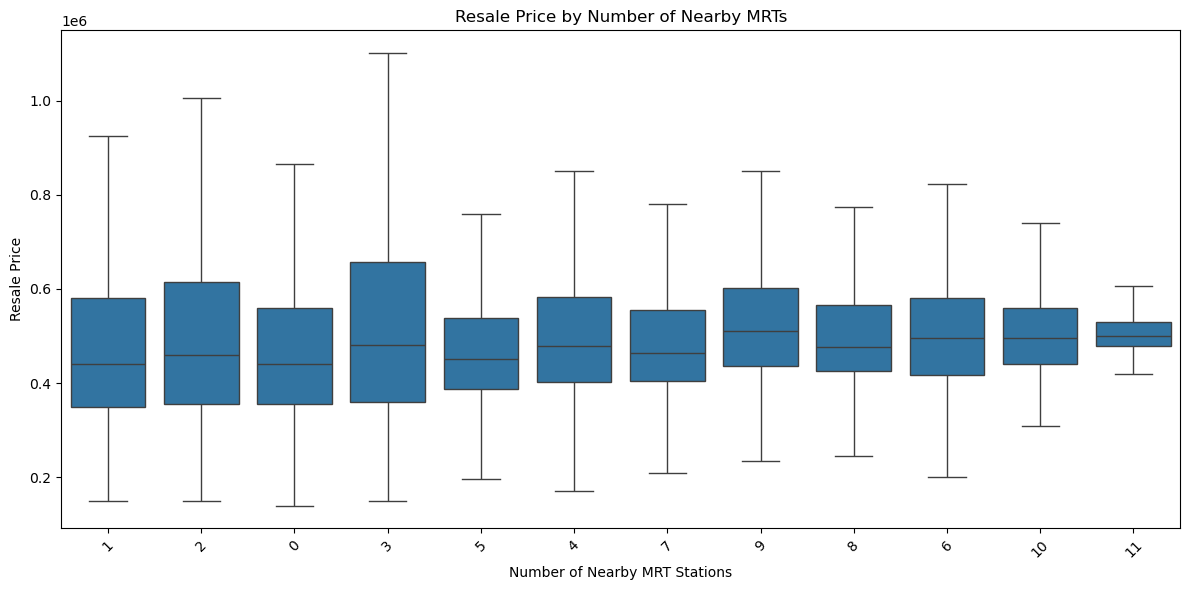

    num_nearby_mrts  min_price  q1_price  median_price     mean_price  \
0                 0   140000.0  356000.0      440000.0  468760.194193   
1                 1   150000.0  350000.0      440000.0  480928.990473   
2                 2   150000.0  355000.0      460000.0  503307.611951   
3                 3   150000.0  360000.0      482000.0  526885.364297   
4                 4   172000.0  402888.0      478000.0  514788.854157   
5                 5   196000.0  388000.0      452000.0  466950.616520   
6                 6   200000.0  418000.0      495000.0  504073.568644   
7                 7   210000.0  405000.0      463888.0  484934.315803   
8                 8   245000.0  425000.0      477500.0  500184.925596   
9                 9   235000.0  436916.0      510000.0  525049.389089   
10               10   310000.0  440000.0      494944.0  507646.623444   
11               11   380000.0  478000.0      500000.0  517147.971631   

    q3_price  max_price  count  
0   560000.0  156

In [14]:
# 13. Boxplot for number of nearby MRT stations
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x=df["num_nearby_mrts"].astype(str), y="resale_price", showfliers=False)
plt.title("Resale Price by Number of Nearby MRTs")
plt.xlabel("Number of Nearby MRT Stations")
plt.ylabel("Resale Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Summary statistics for num_nearby_mrts
summary_num_nearby_mrts = df.groupby("num_nearby_mrts").agg(
    min_price=("resale_price", "min"),
    q1_price=("resale_price", lambda x: np.percentile(x.dropna(), 25)),
    median_price=("resale_price", "median"),
    mean_price=("resale_price", "mean"),
    q3_price=("resale_price", lambda x: np.percentile(x.dropna(), 75)),
    max_price=("resale_price", "max"),
    count=("resale_price", "count")
).reset_index()

print(summary_num_nearby_mrts)

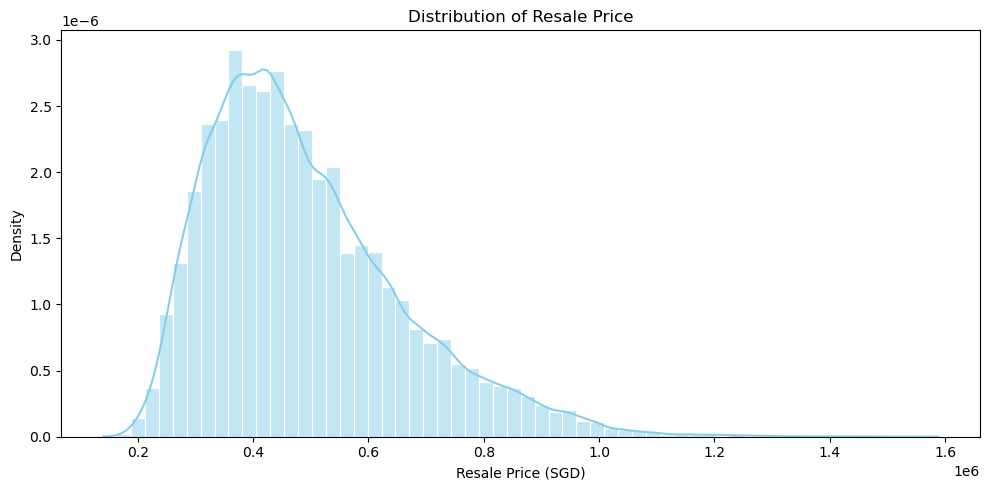

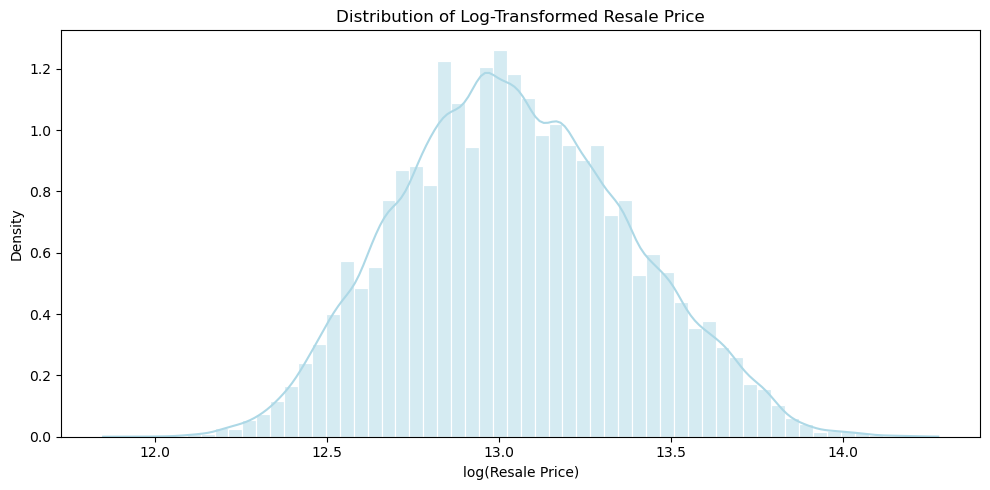

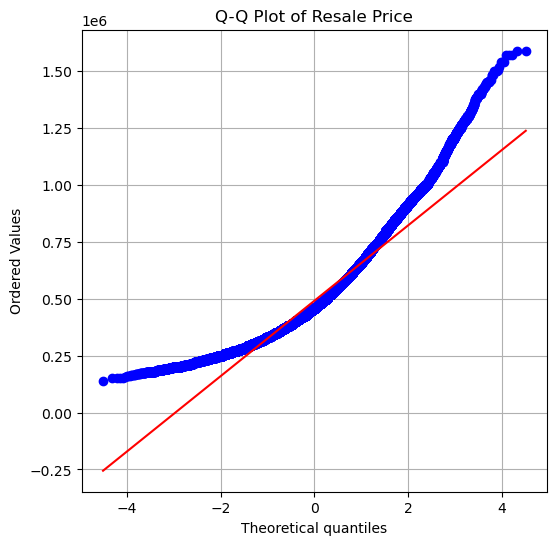

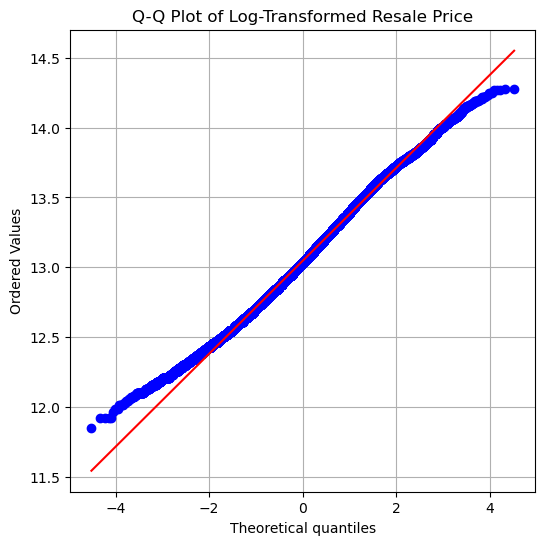

In [15]:
import scipy.stats as stats

# 14. Histogram + Density plot of resale_price
plt.figure(figsize=(10, 5))
sns.histplot(df["resale_price"], bins=60, kde=True, color="skyblue", stat="density", edgecolor="white")
plt.title("Distribution of Resale Price")
plt.xlabel("Resale Price (SGD)")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

# Histogram + Density plot of log(resale_price)
plt.figure(figsize=(10, 5))
sns.histplot(np.log(df["resale_price"]), bins=60, kde=True, color="lightblue", stat="density", edgecolor="white")
plt.title("Distribution of Log-Transformed Resale Price")
plt.xlabel("log(Resale Price)")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

# Q-Q plot for original resale_price
plt.figure(figsize=(6, 6))
stats.probplot(df["resale_price"].dropna(), dist="norm", plot=plt)
plt.title("Q-Q Plot of Resale Price")
plt.grid()
plt.show()

# Q-Q plot for log-transformed resale_price
plt.figure(figsize=(6, 6))
stats.probplot(np.log(df["resale_price"].dropna()), dist="norm", plot=plt)
plt.title("Q-Q Plot of Log-Transformed Resale Price")
plt.grid()
plt.show()

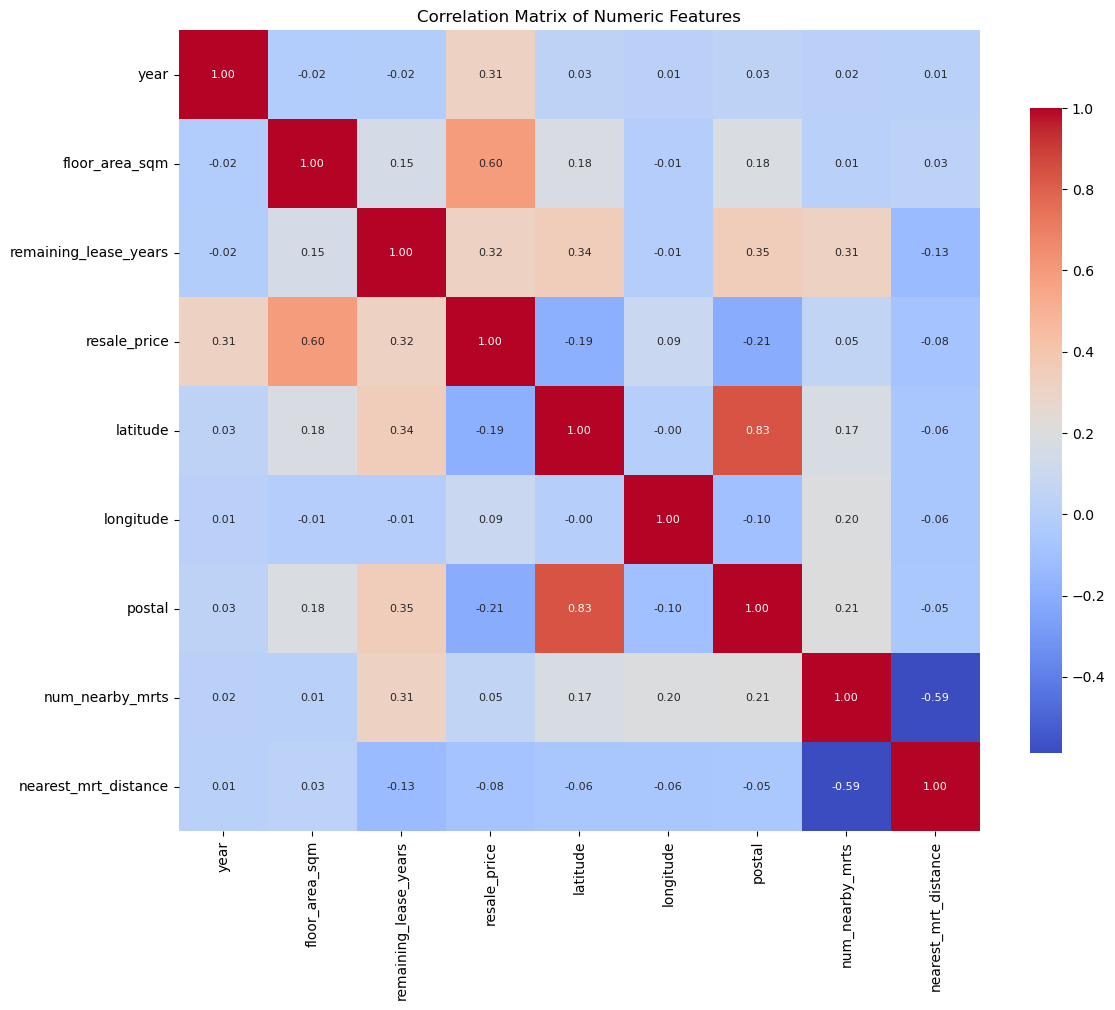

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# 15. Compute and plot correlation matrix for numeric columns
numeric_df = df.select_dtypes(include=[np.number])  # 숫자형 컬럼만 선택
cor_matrix = numeric_df.corr(method='pearson')

plt.figure(figsize=(12, 10))
sns.heatmap(cor_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True,
            cbar_kws={"shrink": .8}, annot_kws={"size": 8})
plt.title("Correlation Matrix of Numeric Features")
plt.tight_layout()
plt.show()

In [17]:
# 16. Count and filter street_name with at least 100 observations
street_counts = df['street_name'].value_counts()

# Filter to keep only street names with at least 100 observations
valid_streets = street_counts[street_counts >= 100].index.tolist()

# Filter the dataframe
df = df[df['street_name'].isin(valid_streets)]

# Number of unique streets remaining
num_unique_streets = df['street_name'].nunique()
print("Number of unique streets with at least 100 entries:", num_unique_streets)

Number of unique streets with at least 100 entries: 439
